# Earthquake Dataset Exploratory Analysis

This notebook guides the exploratory data analysis (EDA) workflow for the Kaggle earthquake alert prediction dataset. Run the cells once the raw files are available in `../data/raw/`.

## 1. Imports and configuration

In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

Matplotlib is building the font cache; this may take a moment.


## 2. Locate raw data

In [2]:
RAW_DATA_DIR = Path('../data/raw')
list(RAW_DATA_DIR.glob('*'))

[PosixPath('../data/raw/earthquake_alert_balanced_dataset.csv')]

## 3. Load primary dataset

In [3]:
PRIMARY_CSV = RAW_DATA_DIR / 'earthquake_alert_balanced_dataset.csv'
if not PRIMARY_CSV.exists():
    raise FileNotFoundError(f"Dataset not found at {PRIMARY_CSV}")

df = pd.read_csv(PRIMARY_CSV)
df.head()

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


## 4. Data quality checks

In [ ]:
df.info()

In [ ]:
df.describe(include='all').T

In [4]:
# Quick dataset overview
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"\nAlert value counts:\n{df['alert'].value_counts()}")

Shape: (1300, 6)

Columns: ['magnitude', 'depth', 'cdi', 'mmi', 'sig', 'alert']

Data types:
magnitude    float64
depth        float64
cdi          float64
mmi          float64
sig          float64
alert         object
dtype: object

Missing values:
magnitude    0
depth        0
cdi          0
mmi          0
sig          0
alert        0
dtype: int64

Alert value counts:
alert
green     325
yellow    325
orange    325
red       325
Name: count, dtype: int64


## 5. Feature distributions

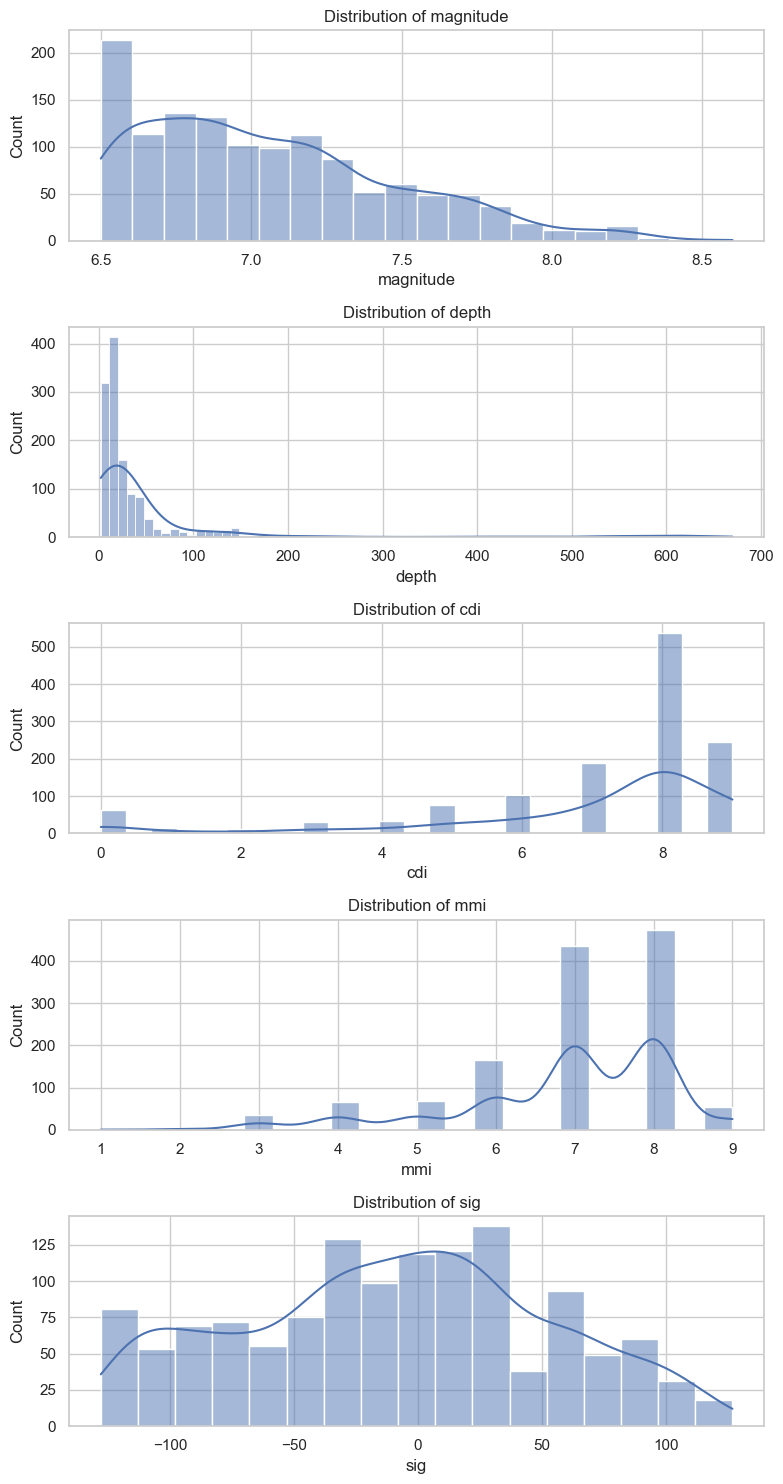

In [5]:
numeric_cols = df.select_dtypes(include='number').columns
fig, axes = plt.subplots(nrows=len(numeric_cols), ncols=1, figsize=(8, 3 * len(numeric_cols)))
if len(numeric_cols) == 1:
    axes = [axes]
for ax, col in zip(axes, numeric_cols):
    sns.histplot(df[col], ax=ax, kde=True)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()

## 6. Correlation matrix

Text(0.5, 1.0, 'Numeric Feature Correlation Matrix')

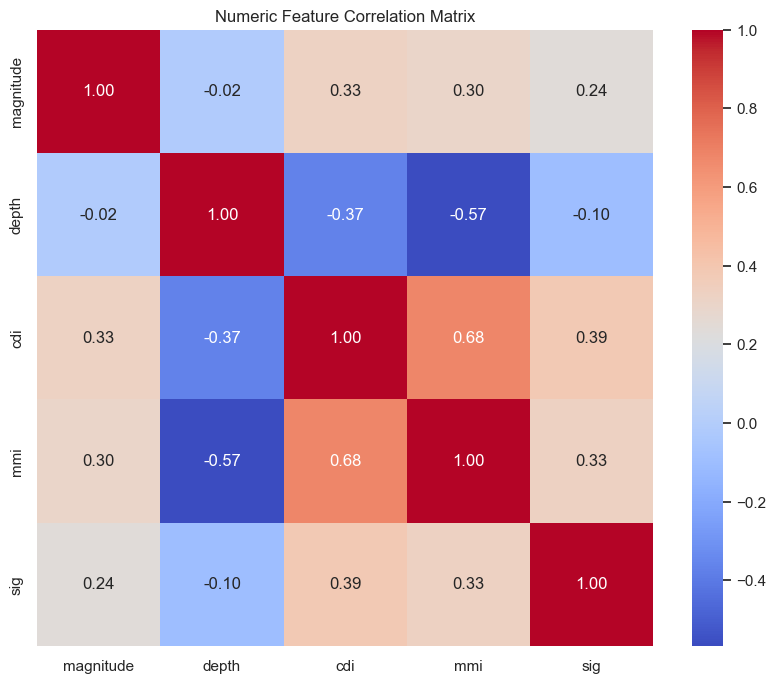

In [6]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Numeric Feature Correlation Matrix')

## 8. Target variable analysis

In [7]:
# Convert alert to binary (high risk = orange/red vs low risk = green/yellow)
df['alert_binary'] = df['alert'].isin(['orange', 'red']).astype(int)

print("Alert distribution:")
print(df.groupby('alert_binary')['alert'].value_counts())
print(f"\nBinary split: {df['alert_binary'].value_counts()}")

# Check feature means by alert level
print("\nFeature means by alert level:")
print(df.groupby('alert')[['magnitude', 'depth', 'cdi', 'mmi', 'sig']].mean())

Alert distribution:
alert_binary  alert 
0             green     325
              yellow    325
1             orange    325
              red       325
Name: count, dtype: int64

Binary split: alert_binary
0    650
1    650
Name: count, dtype: int64

Feature means by alert level:
        magnitude       depth       cdi       mmi        sig
alert                                                       
green    6.856000  114.547692  4.369231  5.243077 -40.461538
orange   7.058000   29.781538  8.049231  7.566154   2.461538
red      7.248185   15.898462  8.141538  8.030769  21.624615
yellow   7.081846   41.058462  7.344615  6.916923 -22.621538


## 9. Prepare dataset for training

In [8]:
# Select features and target for modeling
features = ['magnitude', 'depth', 'cdi', 'mmi', 'sig']
target = 'alert_binary'

# Create the processed dataset
processed_df = df[features + [target]].copy()

# Save to processed directory
from pathlib import Path
processed_dir = Path('../data/processed')
processed_dir.mkdir(parents=True, exist_ok=True)
output_path = processed_dir / 'earthquake_processed.csv'
processed_df.to_csv(output_path, index=False)

print(f"✅ Processed dataset saved to {output_path}")
print(f"Shape: {processed_df.shape}")
print(f"\nFirst few rows:")
processed_df.head()

✅ Processed dataset saved to ../data/processed/earthquake_processed.csv
Shape: (1300, 6)

First few rows:


,magnitude,depth,cdi,mmi,sig,alert_binary
0,7.0,14.0,8.0,7.0,0.0,0
1,6.9,25.0,4.0,4.0,-33.0,0
2,7.0,579.0,3.0,3.0,-13.0,0
3,7.3,37.0,5.0,5.0,65.0,0
4,6.6,624.0,0.0,2.0,-98.0,0


## 7. Next steps

- Engineer temporal aggregations using the preprocessing utilities.
- Export a cleaned dataset with `save_processed_dataset`.
- Document exploratory findings for model feature selection.